# Intro To Data Science With Linear Regression

## What Is Linear Regression? 

In this excercise, you'll utilize the Linear Regression model from Scikit-Learn to predict housing prices in Boston.

Linear regression is the fundamental building block of data science and analytics. If you ever venture into data science, this will most likely be the first model you're taught.


Linear regression models are very simple, interpretable, and somewhat flexible. The goal is to predict a continuous output variable (e.g. MPG, prices, etc.) from a set of predictor variables, known as features.


Within industry, you'll almost always try the linear regression before moving to advanced models, such as GBM, random forests, or neural networks. 

## Getting Started & Preprocessing

First, import the necessary libraries to run the notebook. Press `Shift + Enter` to run the cell below.

In [153]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
from matplotlib.colors import ListedColormap

Load the boston dataset. This is a dataset that's installed within Scikit-Learn.

The goal with this exercise: predict the housing price, using other columns (features) in the dataset.

Load the Boston housing data with the line below.

`boston = load_boston()`

In [154]:
boston = load_boston()

Next, separate the data into the features and target using the following code:

`y = boston.target`

`boston = pd.DataFrame(boston.data)`

In [155]:
y = boston.target

boston = pd.DataFrame(boston.data)

Print the boston dataset using the following code. The `head` method prints out the first 5 lines of your data.

`boston.head()`

In [156]:
boston.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


The columns don't have any labels! This happens with some datasets. Assuming you have a data dictionary, you can label the columns. For the time being, add this line into the cell below, and call the `head` method on the DataFrame again.

Refer to the `data_dictionary.pdf` document to see what each column name refers to.


`boston.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']`

`boston.head()`

In [157]:
boston.columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']

boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now that the data is labeled, we have a better sense of what each column means.

To reiterate, we'll be predicting the housing prices using all of these columns (features). 

## Plotting Correlations

Now that the data is in the right format, we can plot a correlation matrix. This shows us what features are correlated with each other.

For reference, -1 is uncorrelated, and 1 is highly correlated. Run the function below to look at the numbers.



`boston.corr()`

In [158]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220
zn,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


We have the numbers from the correlation matrix, but it's not as easy to view or interpret as a plot.

To see correlations plotted by color, run the `correlation_matrix_plot` function below.

Examine the correlations in the lower triangle, then answer the questions below.

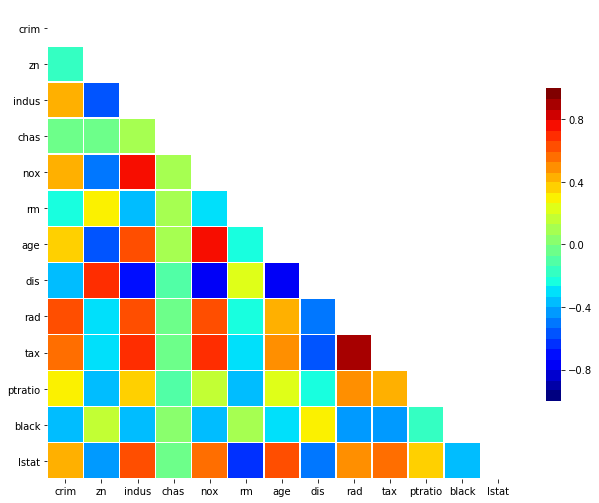

In [159]:
def correlation_matrix_plot(n_top_features, df):
    feats = n_top_features
    corr = df[list(feats)].corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    labels = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    labels = labels.round(2)
    labels = labels.replace(np.nan,' ', regex=True)

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(9,9))

    # Generate a custom diverging colormap
    cmap = cm.get_cmap('jet', 30)
    # Draw the heatmap with the mask and correct aspect ratio
    ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.tight_layout()
    plt.show()
    
    
correlation_matrix_plot(boston.columns,boston)

## Correlation Matrix Questions

Looking at the plot above: 

1. What features are highly correlated?

> From looking at the correlations, `rad` and `tax` are shown to be heavily correlated. 

2. Which features are highly uncorrelated?

> `lstat` is highly uncorrelated with `rm` and `dis`. Additionally, `dis` is highly uncorrelated with `indus`, `nox`, and `age`.

## Building the Linear Regression Model 

Now that the data is in the right format, we can begin to build the linear regression model.

First, we're going to split the data. In data science, your data is split into two datasets.

The first dataset is the *training* set. Building a model is referred to as "training", hence the moniker of a "training" data set. The second dataset is the *test* set. This is used to make predictions, and evaluate if our model is performing well.

To split the data into training and test data sets, type the following line.

`X_train, X_test, y_train, y_test = train_test_split(boston, y, test_size=0.20, random_state=42)`

In [160]:
X_train, X_test, y_train, y_test = train_test_split(boston, y, test_size=0.20, random_state=42)

With the data being split, we'll now create the LinearRegression module. Write the line in the cell below:

`model = LinearRegression()`

In [161]:
model = LinearRegression()

You're now ready to train the model. Write and run the following line:

`model.fit(X_train, y_train)`

In [162]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predict and Score Model 

Now that the model is trained, we can predict new values using the test set. Write the following code to predict the housing prices.

`predictions = model.predict(X_test)`

In [163]:
predictions = model.predict(X_test)

Next, we'll look at the coefficients for our model. Coefficients describe the mathematical relationship between each independent feature(s) and the target variable. 

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

The coefficient value signifies how much the mean of the dependent variable changes given a one-unit shift in the independent variable while holding other variables in the model constant. This property of holding the other variables constant is crucial because it allows you to assess the effect of each variable in isolation from the others.

`coefficients = pd.DataFrame(model.coef_, boston.columns).sort_values(by=0, ascending=False)`

`print(coefficients)`

In [164]:
coefficients = pd.DataFrame(model.coef_, boston.columns).sort_values(by=0, ascending=False)
print(coefficients)

                 0
rm        4.432488
chas      2.786767
rad       0.262114
indus     0.040731
zn        0.030081
black     0.012452
age      -0.006240
tax      -0.010639
crim     -0.112463
lstat    -0.509349
ptratio  -0.916399
dis      -1.448485
nox     -17.240635


Finally, to gain an understanding of how our model is performing, we'll score the model against three metrics: R squared, mean squared error, and mean absolute error. Write the following lines of code to get your output.

`print("R Squared Score: ", r2_score(y_test, predictions))`

`print("Mean Squared Error: ", mean_squared_error(y_test, predictions))`

`print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))`

In [165]:
print("R Squared Score: ", r2_score(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))

R Squared Score:  0.668482575397
Mean Squared Error:  24.3114269297
Mean Absolute Error:  3.19150897227


## Questions

1. Google R Squared, Mean Squared Error, and Mean Absolute Error. What do these metrics mean? What are the numbers telling you?
2. What do you think could improve the model?
3. What features do you think are not useful to the model?

## Answers

1. Google R Squared, Mean Squared Error, and Mean Absolute Error. What do these metrics mean? What are the numbers telling you?

> R Squared (R^2) calculates how close the data is fitted to the line of best fit. A higher R^2 indicates a better fit; however, R^2 can't show you if the predictions are biased. 

> The Mean Squared Error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.

> The Mean Absolute Error (MAE) measures the average magnitude of the errors in a set of forecasts, without considering their direction. It measures accuracy for continuous variables. Expressed in words, the MAE is the average over the verification sample of the absolute values of the differences between forecast and the corresponding observation. The MAE is a linear score which means that all the individual differences are weighted equally in the average.


2. What do you think could improve the model?

> There are multiple items that can improve this model. One is using only a few specific features, as opposed to the entire set of features. You can also apply regularization, which is a way to make the model more generalized (and help prevent overfitting).


3. What features do you think aren't useful to the model?

> One feature that could be removed is the `black` feature, which indicates the proportion of blacks by town. This feature is one that involves too much bias, and should be excluded from analysis.

> Addtionally, the `lstat` feature could be removed, which indicates lower status of the population (percent). Again, this introduces lots of bias, and may need to be excluded.

## Sources

Statistics By Jim - http://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/